# Walmart -Problem Statement 1

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.


# Data loading and Pre-Processing

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib import dates
from datetime import datetime
import sklearn


In [14]:
df=pd.read_csv('Walmart (1).csv')

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [18]:
df['Date'] =  pd.to_datetime(df['Date'])
df.info() #converting Date to Datetime format from object datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [19]:
df.isnull().sum() #finding null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [20]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day

# Data Visualization

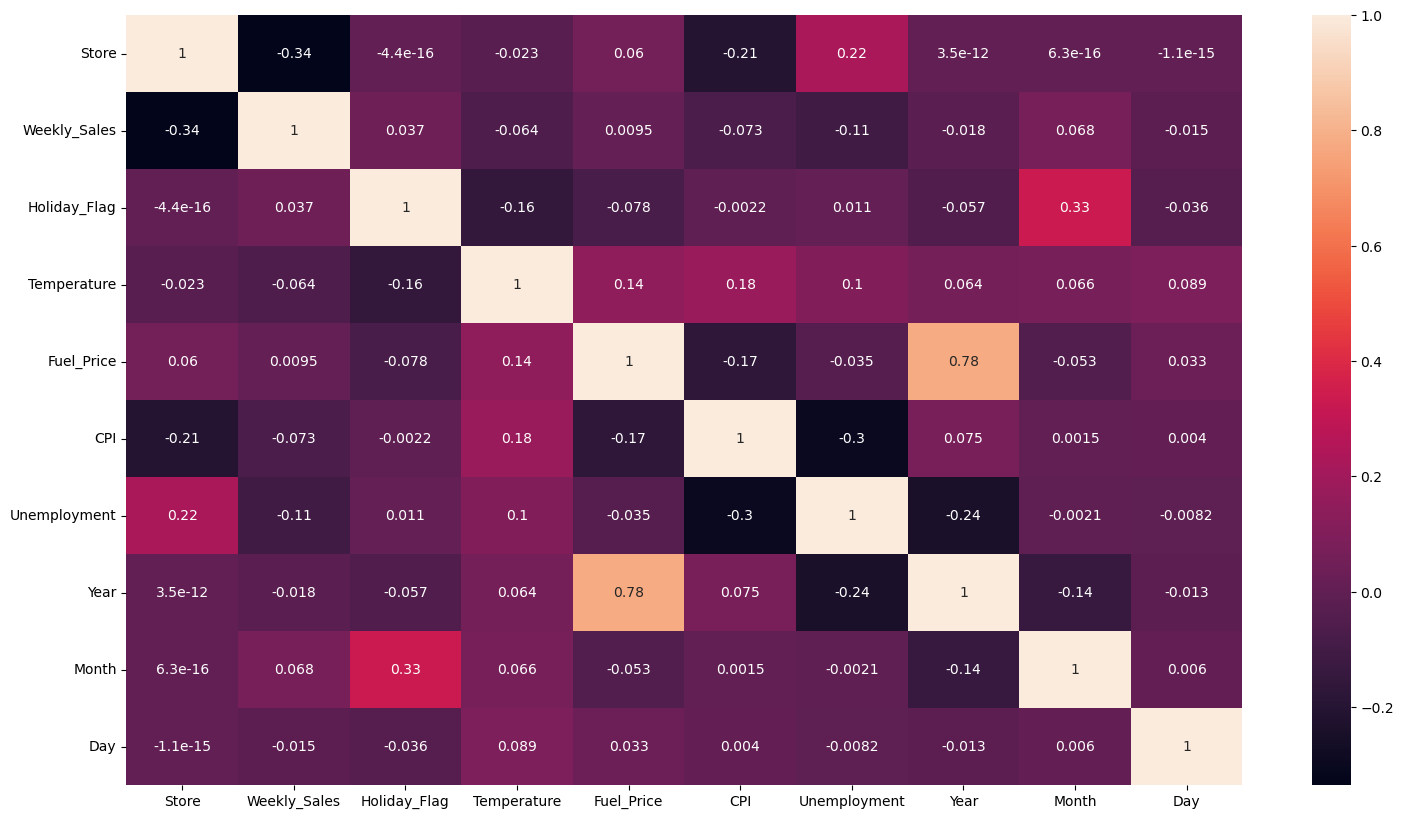

In [24]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1500x700 with 0 Axes>

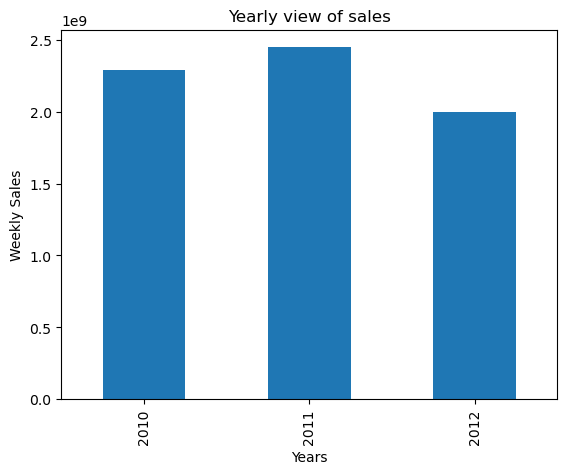

In [25]:
plt.figure(figsize=(15,7))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()
#overall more sales in the year 2011

<Axes: xlabel='Month'>

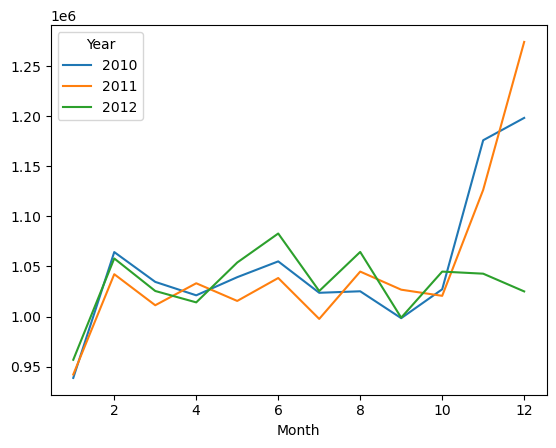

In [28]:
monthwise_sales=pd.pivot_table(df,values='Weekly_Sales',columns='Year',index='Month')
monthwise_sales.plot()
#monthwise sales shows peak in nov-dec

<Figure size 1500x700 with 0 Axes>

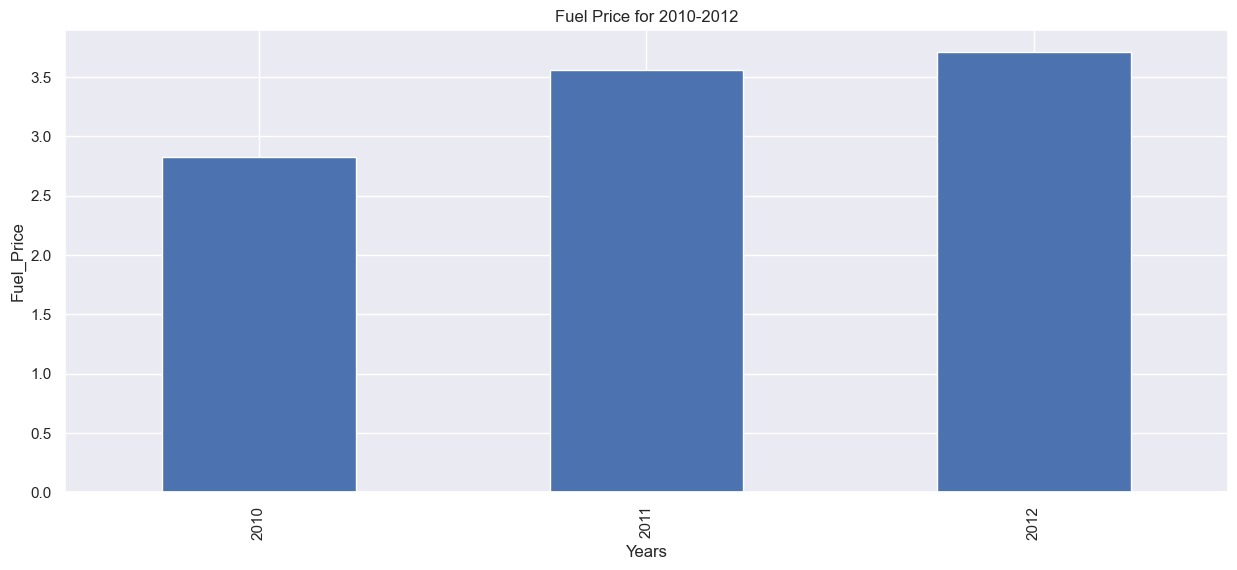

In [135]:
plt.figure(figsize=(15,7))
df.groupby("Year")[["Fuel_Price"]].mean().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Fuel_Price")
plt.title("Fuel Price for 2010-2012")
plt.show()
#increase in fuel price since 2010-2012

In [37]:
#weekly sales might be slight dependent on fuel price as avearge fuel price in 2012 is greater than 2011
#and sales are low in comparison with the year 2011

<Figure size 1500x700 with 0 Axes>

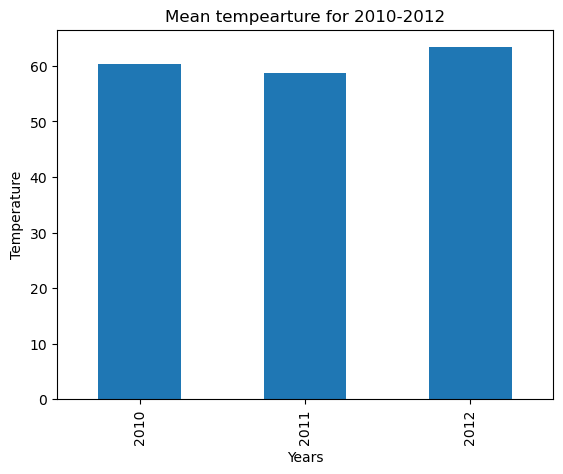

In [39]:
plt.figure(figsize=(15,7))
df.groupby("Year")[["Temperature"]].mean().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Mean tempearture for 2010-2012")
plt.show()

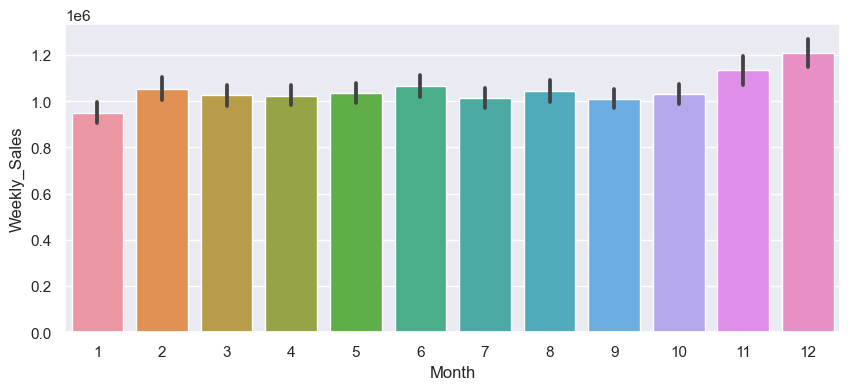

In [70]:

ax=sns.barplot(x=df['Month'],y=df['Weekly_Sales'])
sns.set(rc={'figure.figsize':(10,4)})
#high sales for nov and dec 

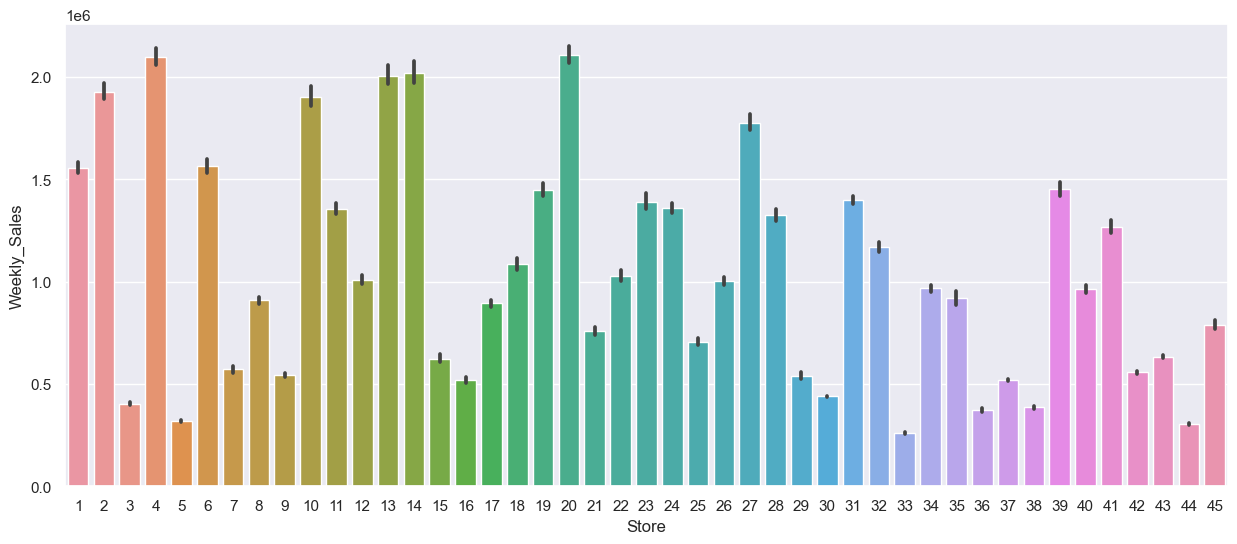

In [156]:
ax=sns.barplot(x=df['Store'],y=df['Weekly_Sales'])
sns.set(rc={'figure.figsize':(15,6)})
#sales based on store

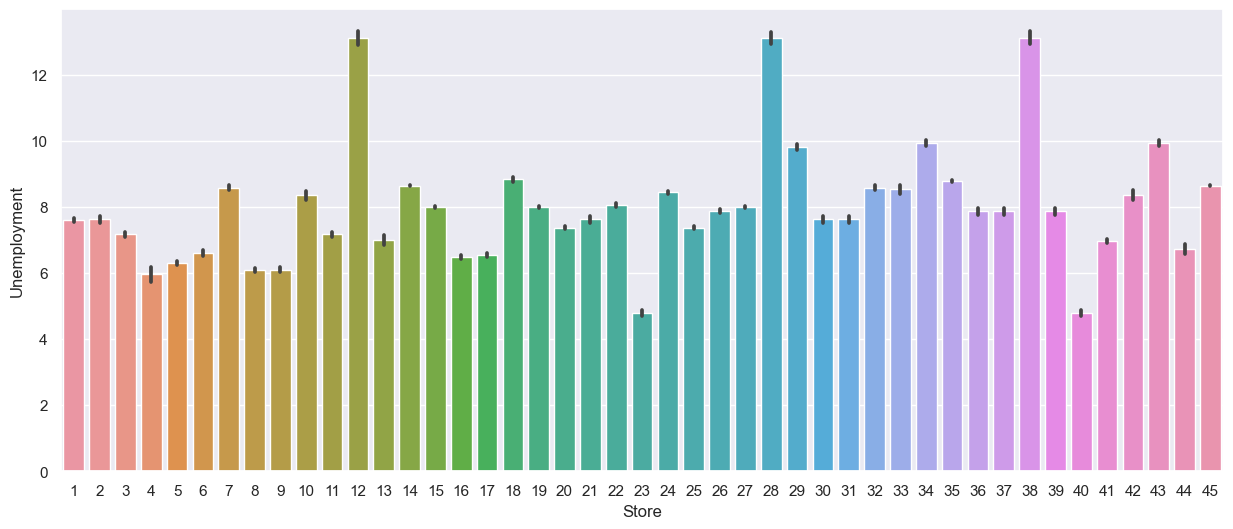

In [50]:
ax=sns.barplot(x=df['Store'],y=df['Unemployment'])
sns.set(rc={'figure.figsize':(10,4)})

# #Holiday analysis

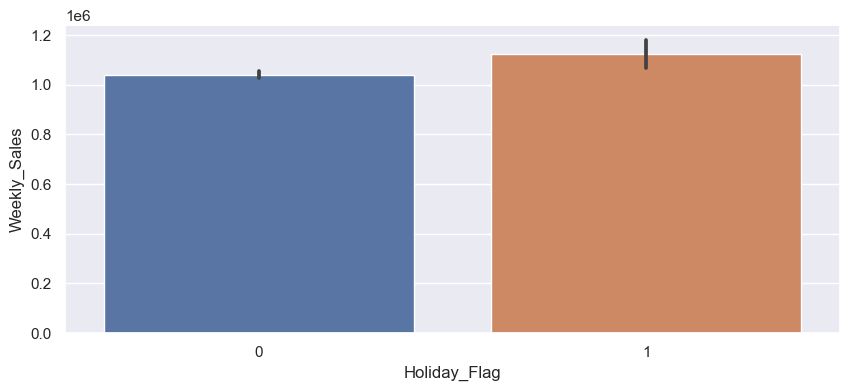

In [51]:
ax=sns.barplot(x=df['Holiday_Flag'],y=df['Weekly_Sales'])
sns.set(rc={'figure.figsize':(10,4)})

In [52]:
Non_Holiday_Sales = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Holiday_Sales=df[df['Holiday_Flag'] == 1 ]['Weekly_Sales'].mean()
print('Mean weekly_sales for Non-Holiday: ',Non_Holiday_Sales)
print('Mean weekly_sales for Holiday: ',Holiday_Sales)

Mean weekly_sales for Non-Holiday:  1041256.3802088555
Mean weekly_sales for Holiday:  1122887.8923555557


In [161]:
(Holiday_Sales/Non_Holiday_Sales)

1.0783971303305018

In [ ]:
ax=sns.barplot(x=df['Store'],y=df['CPI'])
sns.set(rc={'figure.figsize':(10,4)})

In [63]:
#some of the main Holidays of USA
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
new_years_eve = ['31-12-2010', '31-12-2011', '31-12-2012']

In [68]:
Labour_Day_Sales = (pd.DataFrame(df.loc[df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
newyearseve_Sales = (pd.DataFrame(df.loc[df.Date.isin(new_years_eve)]))['Weekly_Sales'].mean()
Labour_Day_Sales,Thanksgiving_Sales,newyearseve_Sales

(1042427.293925926, 1471273.427777778, 898500.4222222222)

In [162]:
Thanksgiving_Sales/Non_Holiday_Sales 
#Thanksgiving weekly_sales is much higher compared to other holidays

1.4129790277805256

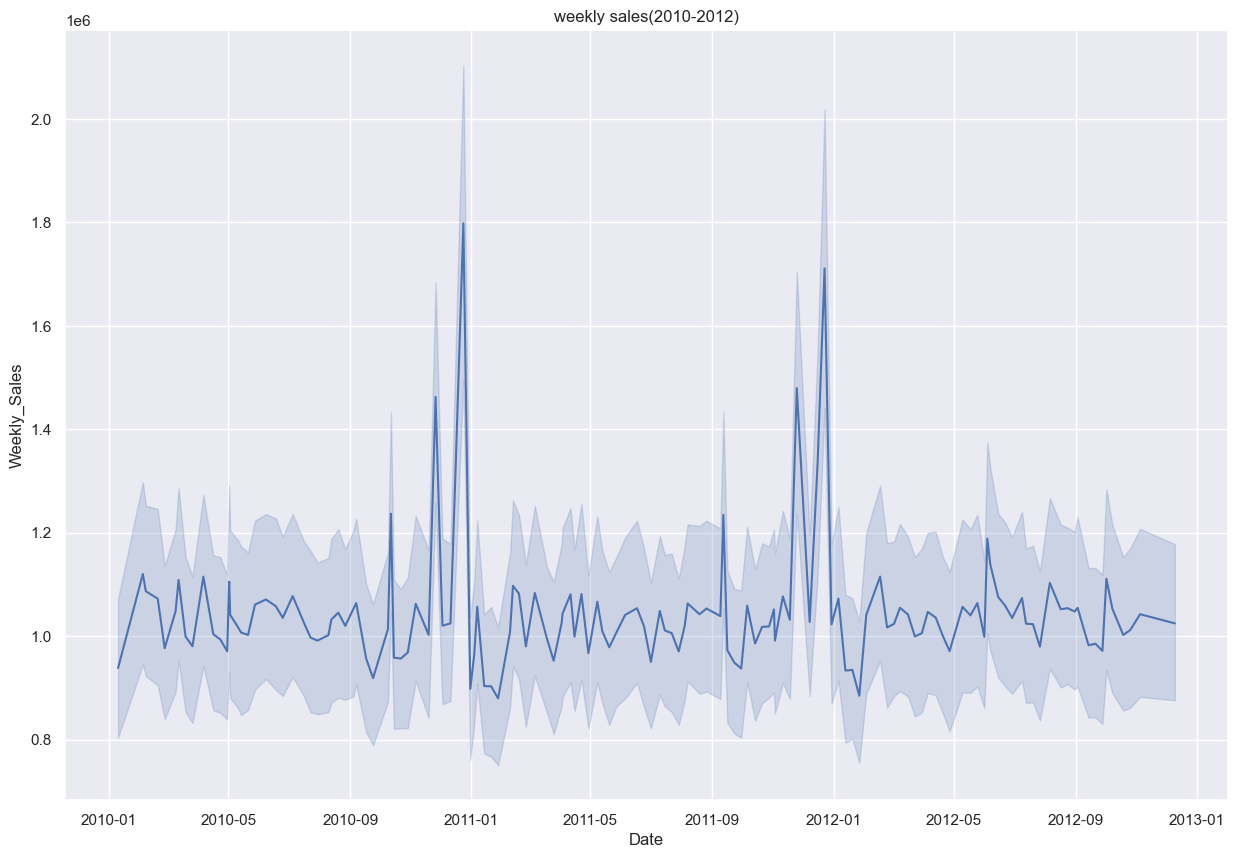

In [129]:
plt.figure(figsize=(15,10))
sns.lineplot(data = df,x = 'Date',y = 'Weekly_Sales')
plt.title('weekly sales(2010-2012)')
plt.show()

# Removing Outliers

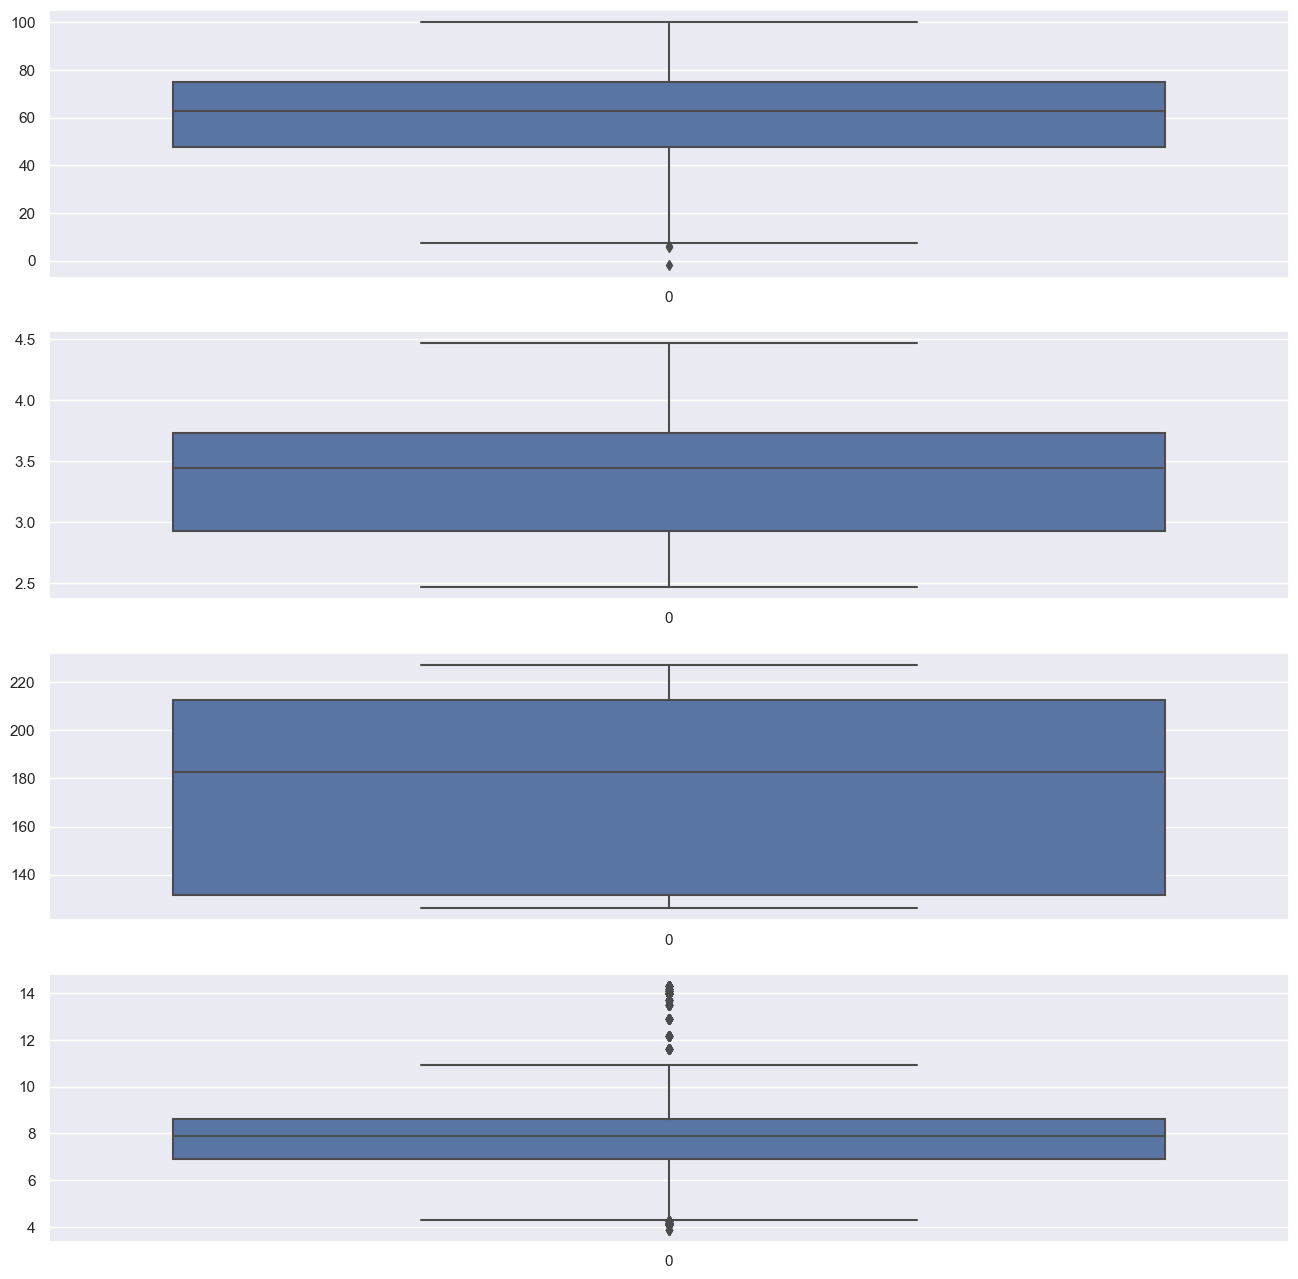

In [89]:
#checking Outliers
fig, axis = plt.subplots(4,figsize=(16,16))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column],ax=axis[i])
    


In [90]:
df2 = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


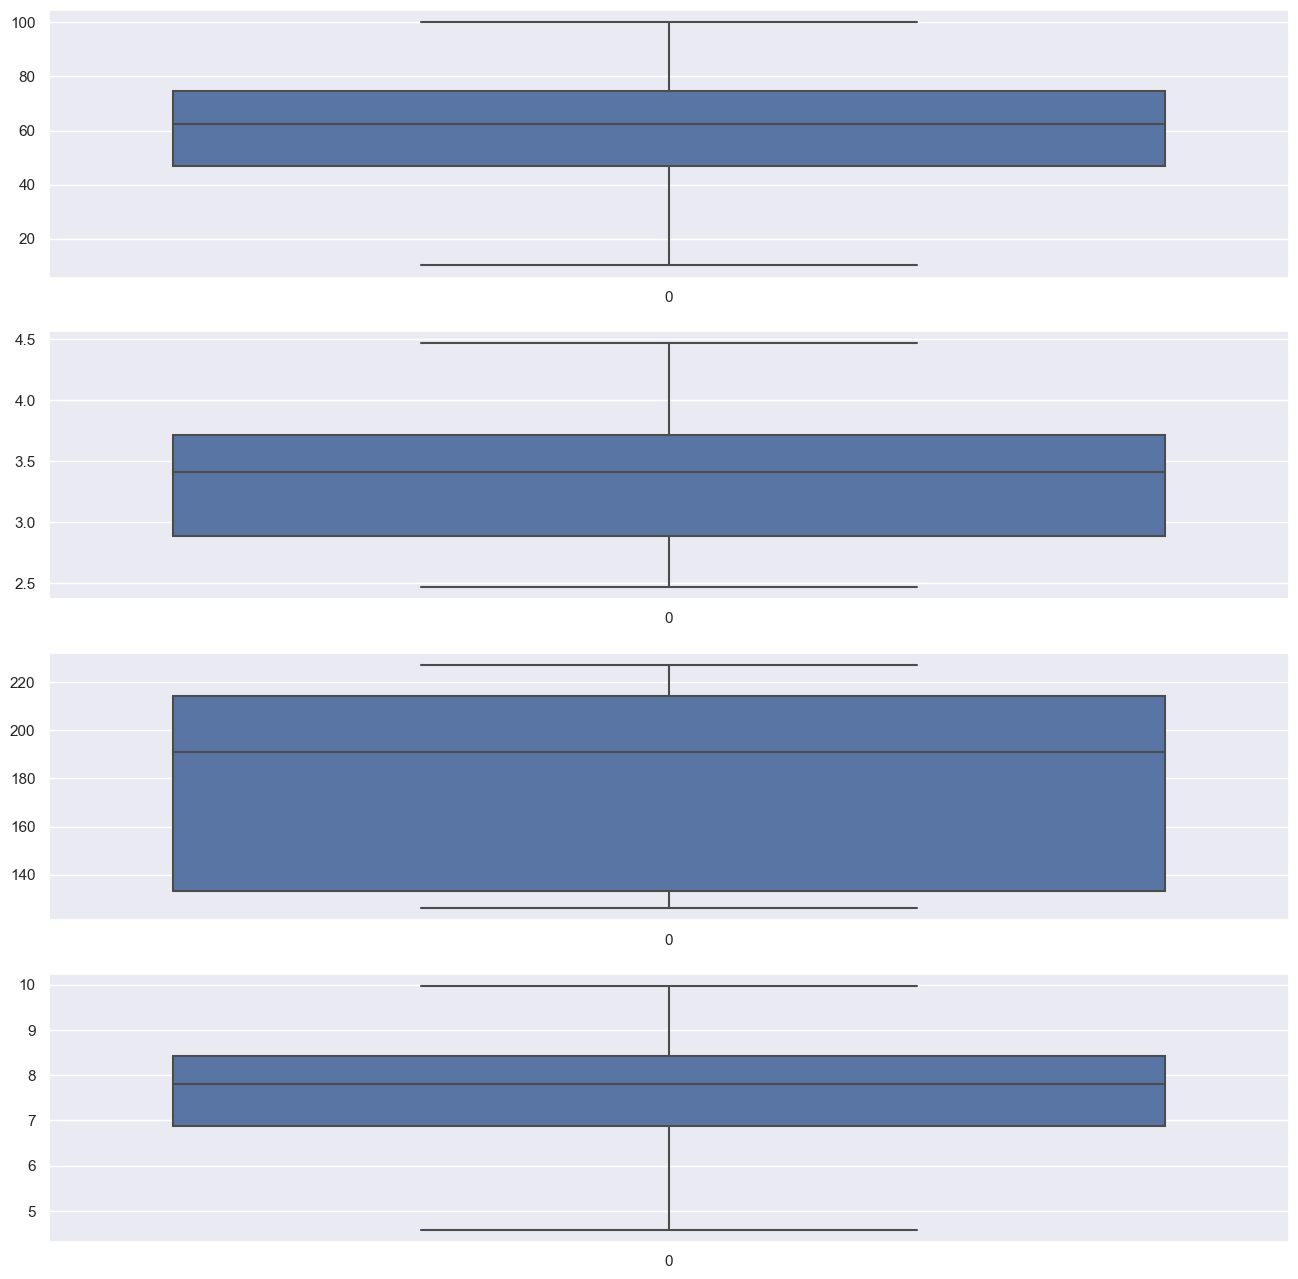

In [91]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = df2[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df2[column], ax=axis[i])


# Data Splitting training and Model Building

In [154]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = df2[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = df2['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 12.937056021974136
Mean Absolute Error: 458396.8237456165
Mean Squared Error: 303857326411.164
Root Mean Squared Error: 551232.5520242469


<Axes: xlabel='Weekly_Sales'>

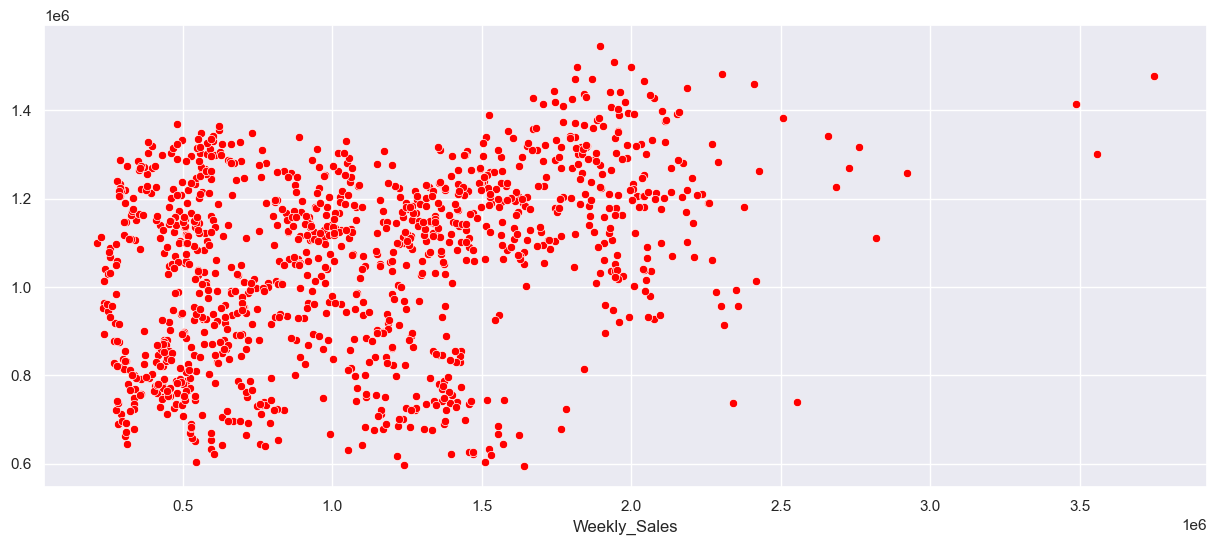

In [155]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(x=Y_test,y=Y_pred,color='red')


Accuracy: 89.3847413567437
Mean Absolute Error: 88049.26421378092
Mean Squared Error: 35060025576.665054
Root Mean Squared Error: 187243.22571635284


<Axes: xlabel='Weekly_Sales'>

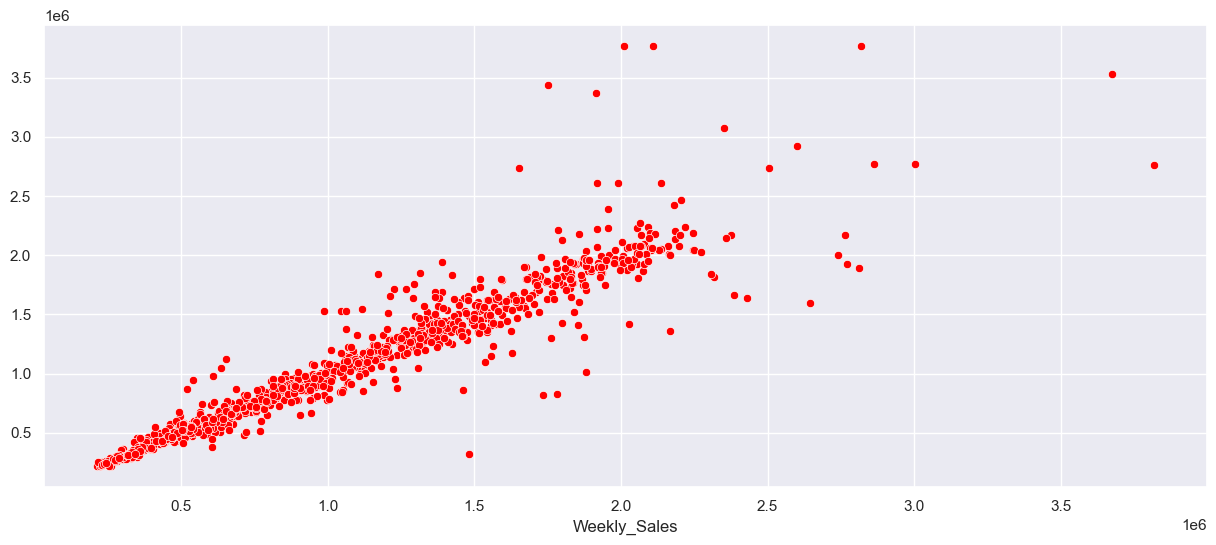

In [148]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print('Accuracy:',model.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(x=Y_test,y=Y_pred,color='red')

Accuracy: 94.0862938628412
Mean Absolute Error: 69138.91542447
Mean Squared Error: 19531760401.653973
Root Mean Squared Error: 139756.07465027762


<Axes: xlabel='Weekly_Sales'>

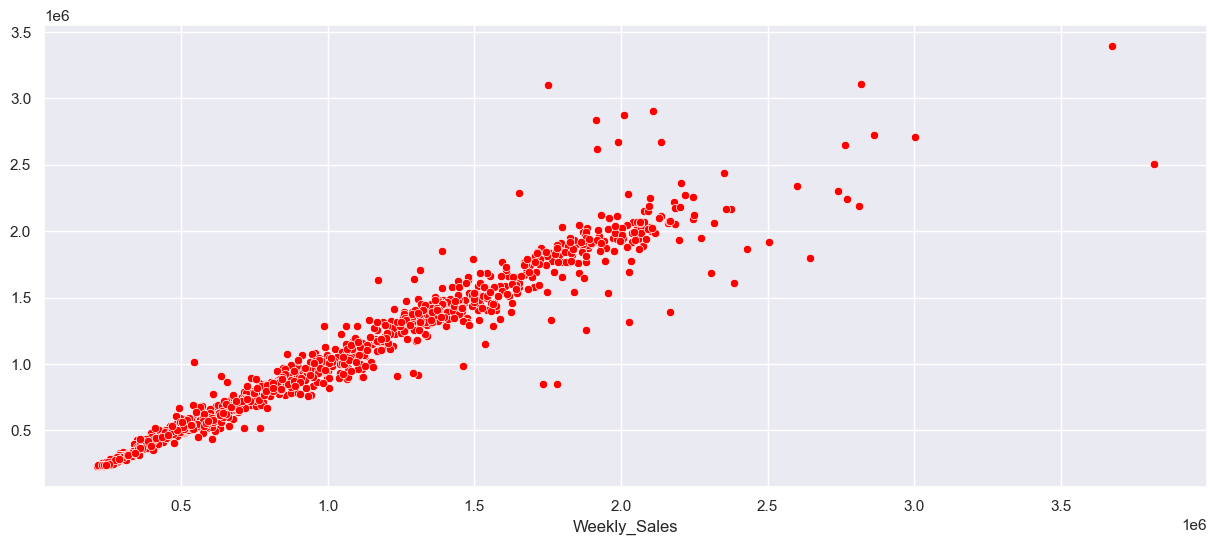

In [150]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()        
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print('Accuracy:',model.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(x=Y_test,y=Y_pred,color='red')


Accuracy: 97.80565820690667
Mean Absolute Error: 51031.243777606
Mean Squared Error: 7247461599.880244
Root Mean Squared Error: 85132.0245259106


<Axes: xlabel='Weekly_Sales'>

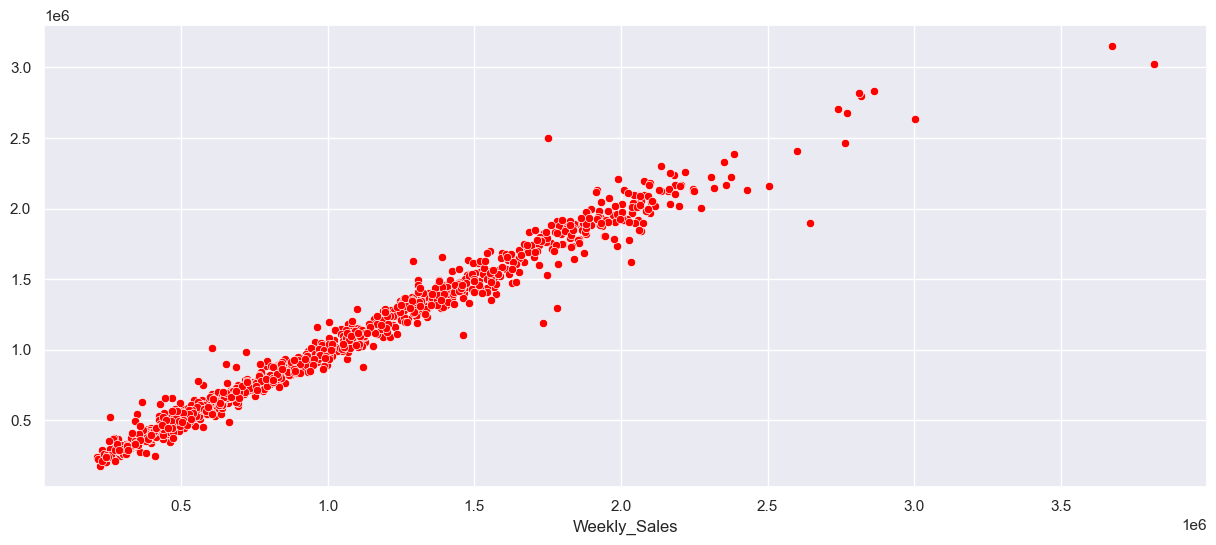

In [151]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print('Accuracy:',model.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(x=Y_test,y=Y_pred,color='red')


# Data Forecast for next 52 weeks or 12 months

In [163]:
# Weekly sales by store
grouped_df = df.groupby('Store')['Weekly_Sales'].apply(list)
forecasts = {}
for store, sales_data in grouped_df.items():
    # Create a dataframe of the sales data with a date range for the next 12 months or 52 weeks
    start_date = pd.to_datetime(df['Date'].max())
    end_date = start_date + pd.Timedelta(weeks=52)
    date_range = pd.date_range(start=start_date, end=end_date, freq='W')
    sales_df = pd.DataFrame({'Date': date_range, 'Weekly_Sales': [0] * 52})
    sales_df.set_index('Date', inplace=True)
    X_train = [[i] for i in range(len(sales_data))]
    y_train = sales_data
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    X_test = [[i + len(sales_data)] for i in range(52)]
    y_pred = model.predict(X_test)
    forecasts[store] = y_pred.tolist()

# Forecast for each store
for store, sales_forecast in forecasts.items():
    print(f"Store {store}: {sales_forecast}")


Store 1: [1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0, 1497612.0]
Store 2: [1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 1837002.125, 18370